In [3]:
#목표 : 캔에 인쇄된 알코올 도수, 당도, PH 값으로 와인 종류 구분하기

In [5]:
#로지스틱 회귀 모델 적용하기
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [11]:
wine.head()

#네번째 열은 타깃값으로, 0이면 레드와인, 1이면 화이트와인이다.

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [13]:
#각 열의 데이터 타입과 누락된 데이터 있는지 확인
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [15]:
#열에 대한 간략한 통계 출력
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [17]:
#판다스 데이터프레임 -> 넘파이 배열
#input과 target으로 나누기, 훈련 세트와 테스트 세트로 나누기

data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [23]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)
#test_size는 테스트 세트 20%를 지정함을 의미한다. (기본은 25%)

In [25]:
#훈련 세트 전처리 -> 같은 객체를 그대로 사용해 테스트 세트도 변환
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [29]:
#로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

#다소 과소적합인 상태

0.7808350971714451
0.7776923076923077


In [31]:
print(lr.coef_, lr.intercept_)

[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


In [33]:
#이사님 왈 .. 순서도처럼 쉽게 설명해서 보고서를 다시 가져오세요 !! -> 결정 트리 이용

In [37]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

#과대적합된 모델임을 알 수 있다.

0.996921300750433
0.8592307692307692


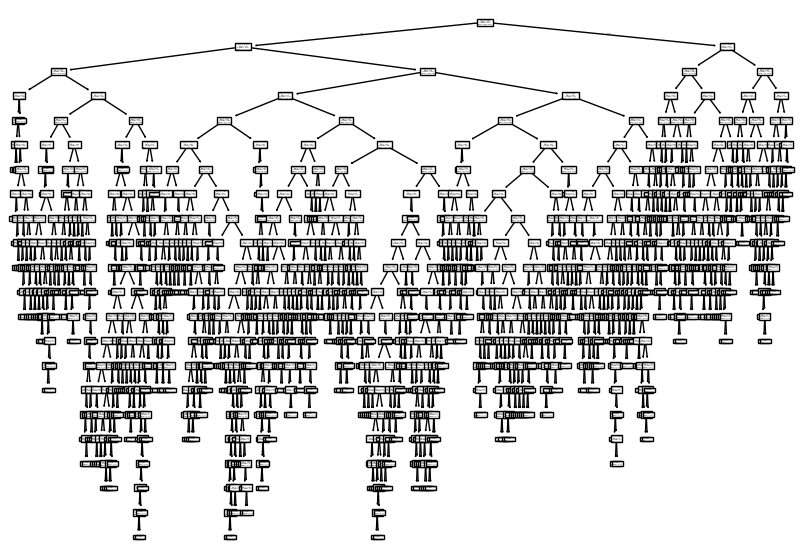

In [39]:
#결정트리 모델을 그림으로 표현하기
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7)) #그림의 크기를 조절하는 매개변수
plot_tree(dt)
plt.show()

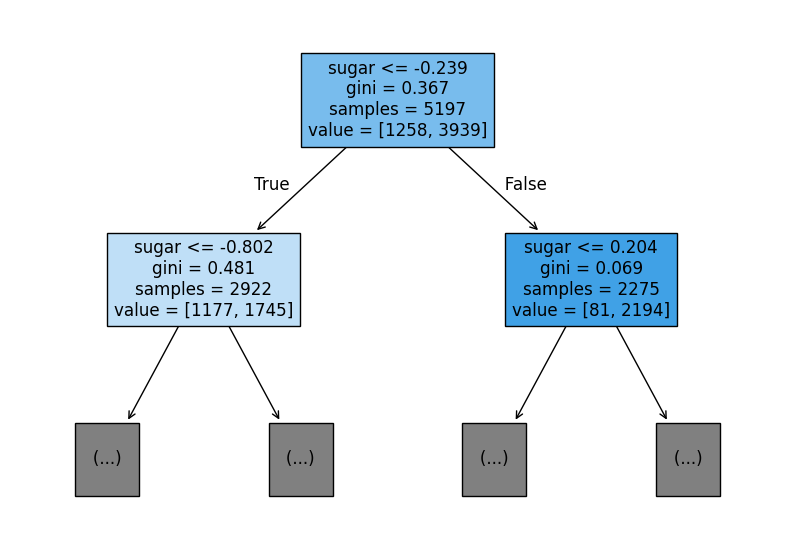

In [43]:
#max_depth로 트리의 깊이 제한하기
#filled 매개변수로 클래스에 맞게 노드의 색 칠하기
#featrue_names 매개변수로 특성의 이름 전달하기

plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

#테스트 조건/총 샘플 수/음성 클래스, 양성 클래스 별 샘플 갯수

In [45]:
#DecisionTreeClassifier 클래스에는 criterion 매개변수가 있다. 이 매개변수의 용도는 노드에서 데이터를 분할할 기준을 정하는 것이다. 이 매개변수의 기본값이 ‘gini’이다.
#지니 불순도 = 1 - (음성 클래스 비율^2 + 양성 클래스 비율^2)
#지니 불순도가 0.5일 때는 최악이고, 노드에 하나의 클래스만 있다면 지니 불순도가 0이 되어 가장 작다. 이런 노드를 순수 노드라고 부른다.
#결정 트리 모델은 부모 노드와 자식 노드의 불순도 차이가 가능한 크도록 트리를 성장 시킨다. 이런 부모 노드와 자식 노드의 불순도 차이를 정보 이득이라고 부른다. (정보 이득이 최대가 되도록 !)
#불순도 차이가 크다는 건, **부모 노드는 섞여 있었지만, 자식 노드는 깔끔하게 정리되었다는 의미!**
#지니 불순도 외에도 엔트로피 불순도도 존재한다. 결과의 차이는 크지 않다.

In [49]:
#자라나는 트리는 훈련 세트에는 잘 맞겠지만 테스트 세트에서 점수는 그에 못 미친다. = 일반화가 잘 안 된다. -> '가지치기'!
#트리의 최대 깊이 지정
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

#훈련 세트의 성능은 낮아졌지만, 테스트 세트의 성능은 거의 그대로이다.

0.8454877814123533
0.8415384615384616


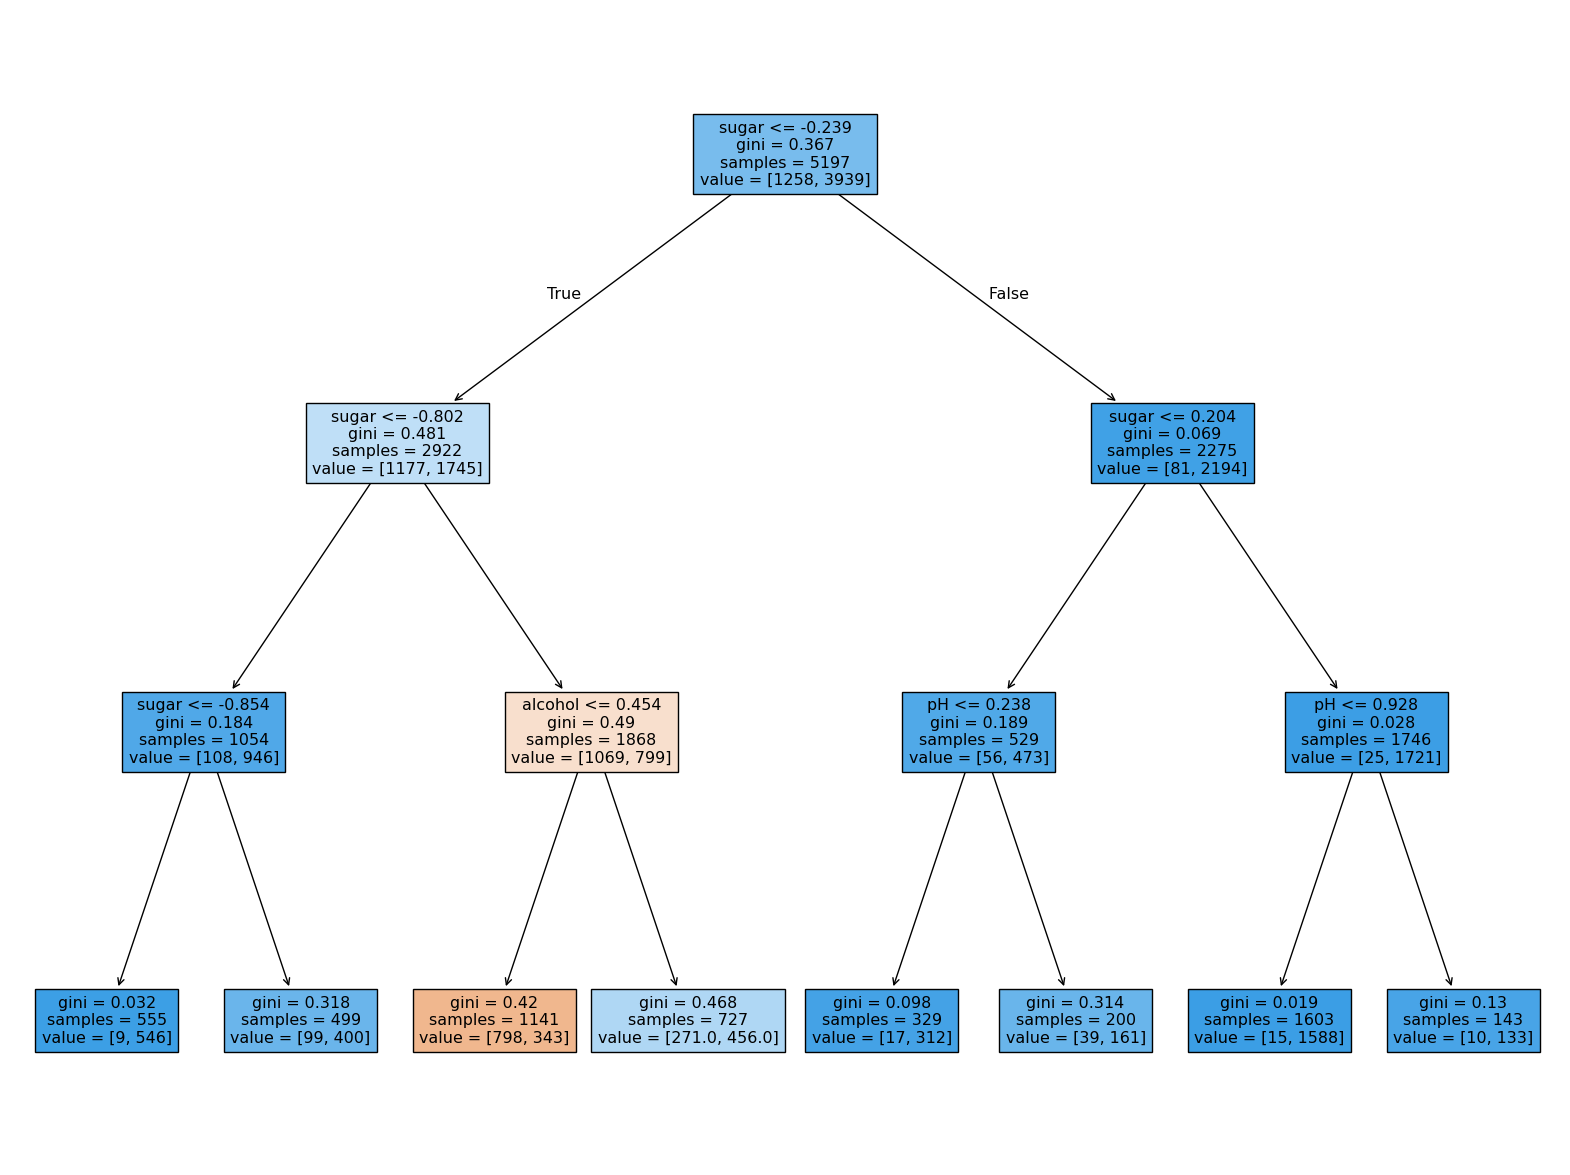

In [51]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [53]:
#불순도를 기준으로 샘플을 나누는데, 불순도는 클래스별 비율을 가지고 계산한다.
#샘플을 어떤 클래스 비율로 나누는지 계산할 때 ‘특성값의 스케일’이 계산에 영향을 미치지 않는다.
#즉, 결정 트리는 표준화 전처리를 할 필요가 없다.

In [55]:
#전처리하기 전의 세트로 결정 트리 모델 다시 훈련
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

#결과가 달라지지 않는다.

0.8454877814123533
0.8415384615384616


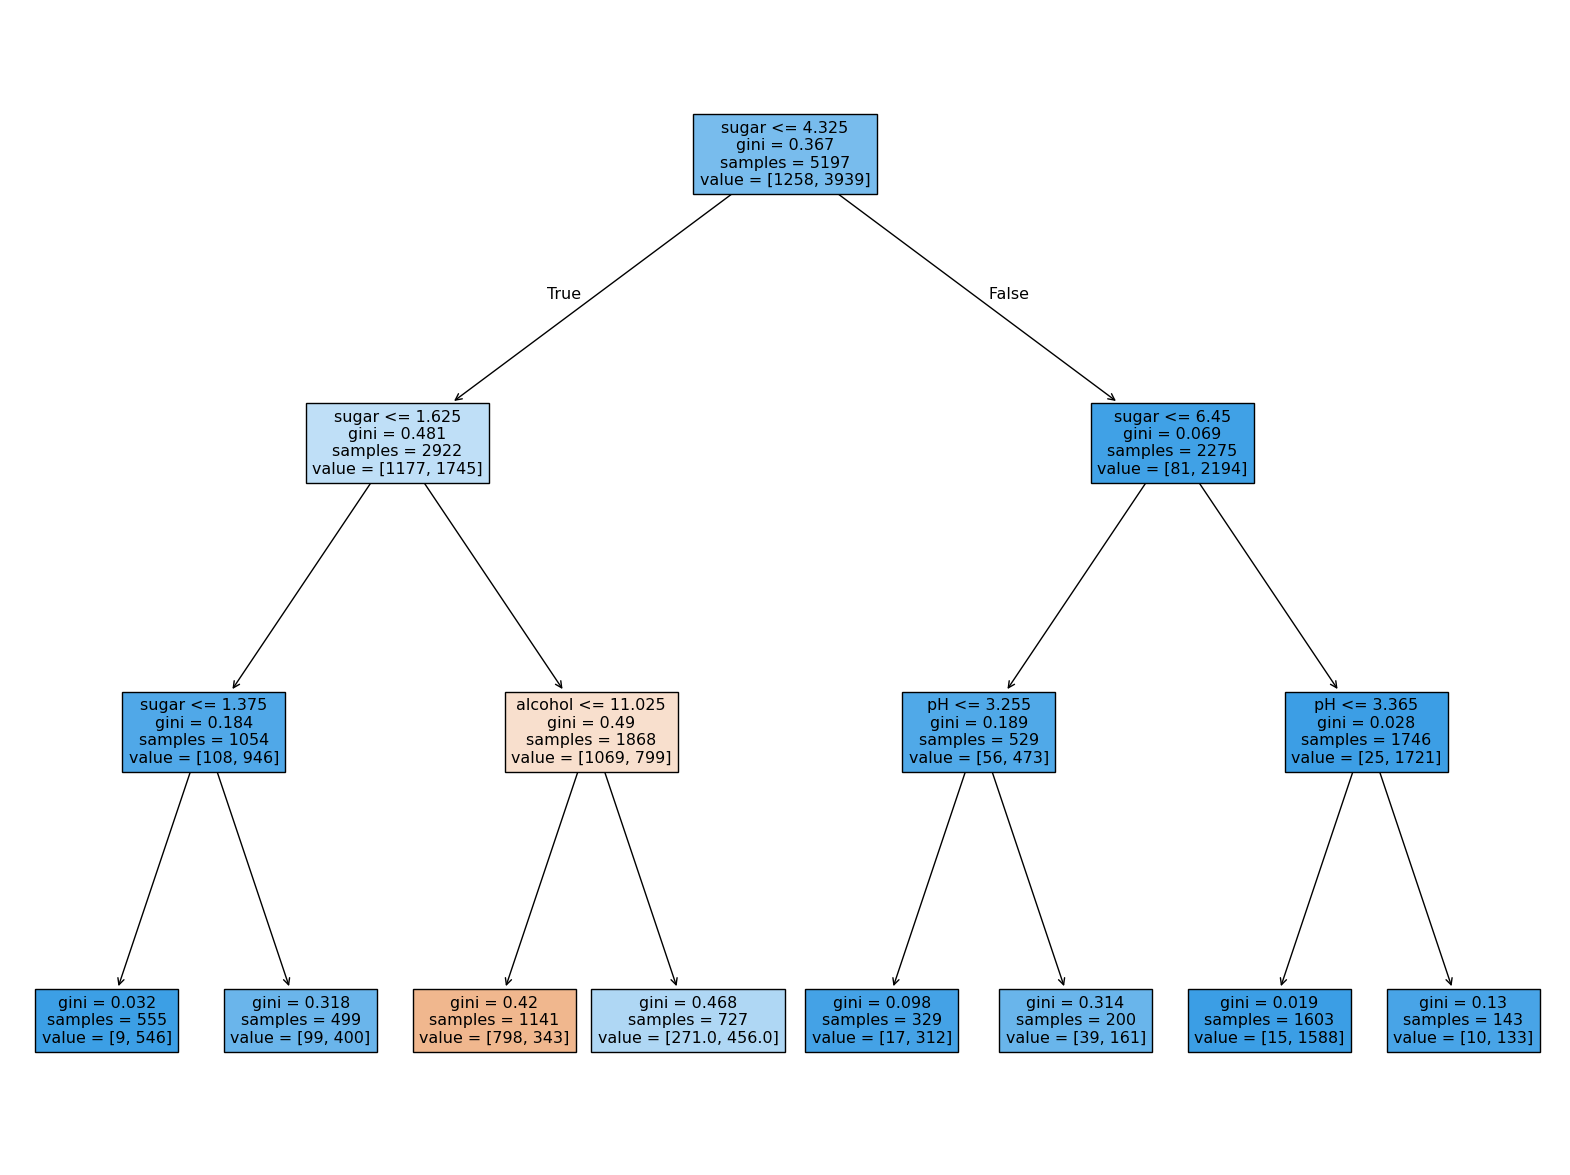

In [57]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [59]:
#결과는 같지만, 특성값을 표준점수로 바꾸지 않았기 때문에 이해하기 쉬워졌다. 음수로 된 당도가 양수로 변함 !

In [63]:
print(dt.feature_importances_)
#어떤 특성이 가장 유용한지 나타낸다.
#아마 루트 노드와 깊이 1에서 사용된 '당도'가 가장 유용할 것

#두번째 특성인 당도가 역시 가장 높다.

[0.12345626 0.86862934 0.0079144 ]
